## Aufgabe 2

In [49]:
%load_ext version_information

import zipfile
import json
filename_zip = "foods-2011-10-03.json.zip"
filename_json = "foods-2011-10-03.json"

archive = zipfile.ZipFile(filename_zip, 'r')
file = archive.open(filename_json)

data = json.load(file)

In [50]:
len(data)

6636

description und group kommen in beiden Dicts vor

In [51]:
data[500].keys()


dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [52]:
data[500].get("nutrients")


[{'value': 14.6,
  'units': 'g',
  'description': 'Protein',
  'group': 'Composition'},
 {'value': 4.7,
  'units': 'g',
  'description': 'Total lipid (fat)',
  'group': 'Composition'},
 {'value': 23.5,
  'units': 'g',
  'description': 'Carbohydrate, by difference',
  'group': 'Composition'},
 {'value': 54.7, 'units': 'g', 'description': 'Ash', 'group': 'Other'},
 {'value': 198.0, 'units': 'kcal', 'description': 'Energy', 'group': 'Energy'},
 {'value': 2.5, 'units': 'g', 'description': 'Water', 'group': 'Composition'},
 {'value': 828.0, 'units': 'kJ', 'description': 'Energy', 'group': 'Energy'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Sugars, total',
  'group': 'Composition'},
 {'value': 0.0,
  'units': 'g',
  'description': 'Fiber, total dietary',
  'group': 'Composition'},
 {'value': 190.0,
  'units': 'mg',
  'description': 'Calcium, Ca',
  'group': 'Elements'},
 {'value': 1.87,
  'units': 'mg',
  'description': 'Iron, Fe',
  'group': 'Elements'},
 {'value': 56.0,
  'units':

Kopiere die Spalten **description**, **group**, **id** und **manufacturer** aus den Daten in ein eigenes DataFrame **info**

In [53]:
import pandas as pd
import numpy as np
info = pd.DataFrame(data, columns=["description","group","id","manufacturer"])
info.head()

,description,group,id,manufacturer
0,"Cheese, caraway",Dairy and Egg Products,1008,
1,"Cheese, cheddar",Dairy and Egg Products,1009,
2,"Cheese, edam",Dairy and Egg Products,1018,
3,"Cheese, feta",Dairy and Egg Products,1019,
4,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,1028,


Array mit einzelnen DataFrames von Nutrients erstellen.

In [54]:
nutrients_list = []
index = 0
for elem in data:
    data_frame = pd.DataFrame(elem.get("nutrients"))
    head = [elem.get("id")] * len(data_frame)
    data_frame["id"] = head
    nutrients_list.append(data_frame)

nutrients = np.asarray(nutrients_list, dtype=object)
print(nutrients[1].head())

    value units                  description        group    id
0   24.90     g                      Protein  Composition  1009
1   33.14     g            Total lipid (fat)  Composition  1009
2    1.28     g  Carbohydrate, by difference  Composition  1009
3    3.93     g                          Ash        Other  1009
4  403.00  kcal                       Energy       Energy  1009


Array in ein großes DataFrame zusammenfassen.

In [55]:
nutrients_concat = pd.concat(nutrients)
print(nutrients_concat.head())
print(nutrients_concat.shape)

    value units                  description        group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008
(389355, 5)


Duplikate aus der Nutrients Tabelle entfernen.

In [56]:
nutrients_nodup = nutrients_concat.drop_duplicates()
print(nutrients_nodup.head())
print(nutrients_nodup.shape)

    value units                  description        group    id
0   25.18     g                      Protein  Composition  1008
1   29.20     g            Total lipid (fat)  Composition  1008
2    3.06     g  Carbohydrate, by difference  Composition  1008
3    3.28     g                          Ash        Other  1008
4  376.00  kcal                       Energy       Energy  1008
(375176, 5)


Spalten umbenennen, damit Tabellen zusammengeführt werden können.

In [57]:
nutrients_clean = nutrients_nodup.rename(columns={"description" : "nutrient_description", "group" : "nutrient_group"})
print(nutrients_clean.head())

info_clean = info.rename(columns={"description" : "info_description", "group" : "info_group"})
print(info_clean.head())

    value units         nutrient_description nutrient_group    id
0   25.18     g                      Protein    Composition  1008
1   29.20     g            Total lipid (fat)    Composition  1008
2    3.06     g  Carbohydrate, by difference    Composition  1008
3    3.28     g                          Ash          Other  1008
4  376.00  kcal                       Energy         Energy  1008
                     info_description              info_group    id  \
0                     Cheese, caraway  Dairy and Egg Products  1008   
1                     Cheese, cheddar  Dairy and Egg Products  1009   
2                        Cheese, edam  Dairy and Egg Products  1018   
3                        Cheese, feta  Dairy and Egg Products  1019   
4  Cheese, mozzarella, part skim milk  Dairy and Egg Products  1028   

  manufacturer  
0               
1               
2               
3               
4               


Einzelne Tabellen werden Zusammengeführt

In [58]:
new_data = pd.merge(nutrients_clean, info_clean, on="id", how="outer")
print(new_data.head())
print(new_data.shape)

    value units         nutrient_description nutrient_group    id  \
0   25.18     g                      Protein    Composition  1008   
1   29.20     g            Total lipid (fat)    Composition  1008   
2    3.06     g  Carbohydrate, by difference    Composition  1008   
3    3.28     g                          Ash          Other  1008   
4  376.00  kcal                       Energy         Energy  1008   

  info_description              info_group manufacturer  
0  Cheese, caraway  Dairy and Egg Products               
1  Cheese, caraway  Dairy and Egg Products               
2  Cheese, caraway  Dairy and Egg Products               
3  Cheese, caraway  Dairy and Egg Products               
4  Cheese, caraway  Dairy and Egg Products               
(375176, 8)


DataFrame, dass nur Einträge mit der nutient_description "Zinc, Zn" enthält.

In [59]:
zinc_data = new_data[new_data["nutrient_description"].str.contains("Zinc, Zn")]
print(zinc_data.head())

     value units nutrient_description nutrient_group    id  \
14    2.94    mg             Zinc, Zn       Elements  1008   
75    3.11    mg             Zinc, Zn       Elements  1009   
151   3.75    mg             Zinc, Zn       Elements  1018   
222   2.88    mg             Zinc, Zn       Elements  1019   
293   2.76    mg             Zinc, Zn       Elements  1028   

                       info_description              info_group manufacturer  
14                      Cheese, caraway  Dairy and Egg Products               
75                      Cheese, cheddar  Dairy and Egg Products               
151                        Cheese, edam  Dairy and Egg Products               
222                        Cheese, feta  Dairy and Egg Products               
293  Cheese, mozzarella, part skim milk  Dairy and Egg Products               


(array([5.944e+03, 1.700e+02, 5.000e+00, 3.000e+00, 3.000e+00, 6.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 2.000e+00]),
 array([ 0.   ,  9.095, 18.19 , 27.285, 36.38 , 45.475, 54.57 , 63.665,
        72.76 , 81.855, 90.95 ]),
 <BarContainer object of 10 artists>)

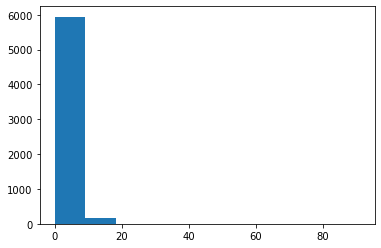

In [60]:
import matplotlib.pyplot as plt
zn_values = zinc_data["value"]
plt.hist(zn_values)

Grobe Beschreibung der Zinkenthaltenden Nahrungsmitteln.

In [61]:
zn_values.describe()

count    6137.000000
mean        2.228589
std         3.975321
min         0.000000
25%         0.340000
50%         0.980000
75%         2.980000
max        90.950000
Name: value, dtype: float64

Edamer hat mehr Zink als das durchschnittliche Nahrungsmittel, das Zink enthält.

In [62]:
edamer = zinc_data[zinc_data["info_description"].str.contains("Cheese, edam")]
edamer["value"] > zn_values.mean()

151    True
Name: value, dtype: bool

Edamer hat mehr Zink als 75% der Nährstoffe, die Zink enthalten.

In [63]:
count = 0
for value in zn_values:
    if edamer["value"].item() > value:
        count = count + 1

count > len(zn_values)*0.75

True

Der Nährstoff mit dem Maximalen Zinkgehalt ist **Mollusks, oyster, eastern, canned** mit 90,95mg Zink

In [1]:
zinc_data[zinc_data.value == zinc_data.value.max()]

NameError: name 'zinc_data' is not defined

In [6]:
%version_information numpy, pandas, matplotlib

Software versions
Python 3.9.7 64bit [GCC 7.5.0]
IPython 7.27.0
OS Linux 5.11.0 37 generic x86_64 with glibc2.31
numpy 1.21.2
pandas 1.3.3
matplotlib 3.4.2
Thu Oct 21 09:41:29 2021 CEST